<a href="https://colab.research.google.com/github/Sayed606Dawodi/Clinic-Management-System-using-Java-Swing/blob/main/ITC_300_Final_Project_Sayed_Mohammad_Reza_Dawodi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The dataset contains Sales data of an Automobile company.
You can access it through the following link:
[link text](https://www.kaggle.com/datasets/ddosad/auto-sales-data/download?datasetVersionNumber=1)


**Introduction and Description of Data:** Description of relevant knowledge. Why is this problem important? Why is it challenging? Introduce the motivations for the project question and how that question was defined through preliminary EDA.

An Automobile company faces bankruptcy (losses) by the end of 2020. Therefore, the company wants to analyze the records of the past three years.

In [3]:
#Let's import all libraries that we are goning to use in this notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
#pip install geopandas
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
#reading the csv file and store it into a variable (dataset)
dataset = pd.read_csv("Auto Sales data.csv")

In [5]:
#Let's have a look at the dataset
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [6]:
#Finding the number of rows and columns!
dataset.shape

(2747, 20)

In [7]:
#Columns' names
dataset.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [8]:
#a breif description of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

**Null Values?**

In [9]:
dataset.isnull().any()

ORDERNUMBER             False
QUANTITYORDERED         False
PRICEEACH               False
ORDERLINENUMBER         False
SALES                   False
ORDERDATE               False
DAYS_SINCE_LASTORDER    False
STATUS                  False
PRODUCTLINE             False
MSRP                    False
PRODUCTCODE             False
CUSTOMERNAME            False
PHONE                   False
ADDRESSLINE1            False
CITY                    False
POSTALCODE              False
COUNTRY                 False
CONTACTLASTNAME         False
CONTACTFIRSTNAME        False
DEALSIZE                False
dtype: bool

**Duplicates Values**

In [10]:
dataset.duplicated().sum()

0

**Statistical Description of the dataset**

In [11]:
dataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [12]:
#Box_plot for finding the outliers
import matplotlib.pyplot as plt

def box_plot(data, col):
    # Create a box plot with custom settings
    fig, ax = plt.subplots()

    # Customize the box plot
    boxplot = ax.boxplot(data[col], patch_artist=True, notch=True, vert=True)

    # Add a + marker for the median of each box
    for median in boxplot['medians']:
        median.set(marker='+', color='black', markersize=10)

    # Customize the colors of the box, whiskers, caps, and outliers
    colors = ['#1f77b4']  # Example colors, feel free to change
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    for whisker, cap in zip(boxplot['whiskers'], boxplot['caps']):
        whisker.set(color='black', linestyle='-', linewidth=2)
        cap.set(color='black', linewidth=2)

    for flier in boxplot['fliers']:
        flier.set(marker='+', color='red', markersize=8)

    # Customize the axes labels and title
    ax.set_ylabel('Values')
    ax.set_xlabel(col)
    ax.set_title(f'Box Plot of {col}')

    # Set x-axis ticks without '1'
    ax.set_xticks([])

    # Show the plot
    plt.show()

# Example usage
# Replace 'data' and 'col' with your actual data and column name
# box_plot(your_data, 'your_column')


**Note:** Based on Domain knowledge, analysis goals, and impact on analysis, I cannot remove the outliers. For instance, there might be a train or a car type that costs more. Therefore, the data does not introduce bias or distort statistical measures.  

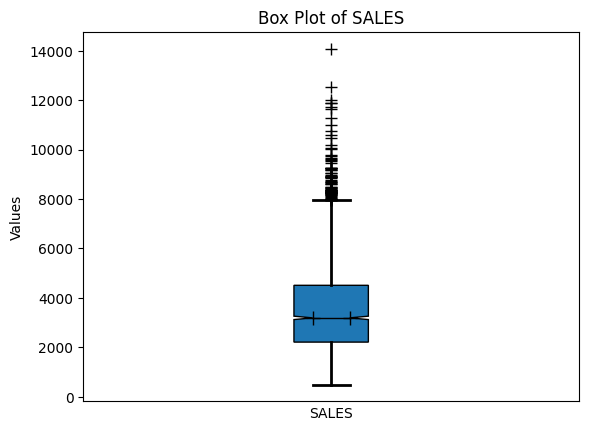

In [13]:
box_plot(dataset, 'SALES')

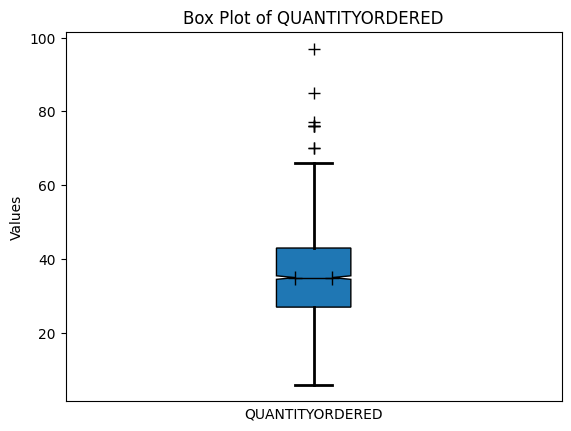

In [14]:
box_plot(dataset, 'QUANTITYORDERED')

ORDERDATE should be in a correct format!
For instance: we can convert ORDERDATE from dd/mm/year into separate columns (int type).

In [15]:
dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'])

<ipython-input-15-dc47451a8aff>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['ORDERDATE'] = pd.to_datetime(dataset['ORDERDATE'])


**Converting day from numeric (03) to string (Thu).**

In [16]:
dataset['DAY'] = dataset['ORDERDATE'].dt.strftime('%a')

**Converting months from numeric (01) to string (Jan).**

In [17]:
dataset['MONTH'] = dataset['ORDERDATE'].dt.strftime('%b')

In [18]:
#Year to a new column
dataset['YEAR'] = dataset['ORDERDATE'].dt.year

<ipython-input-19-c943757a80c4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True))


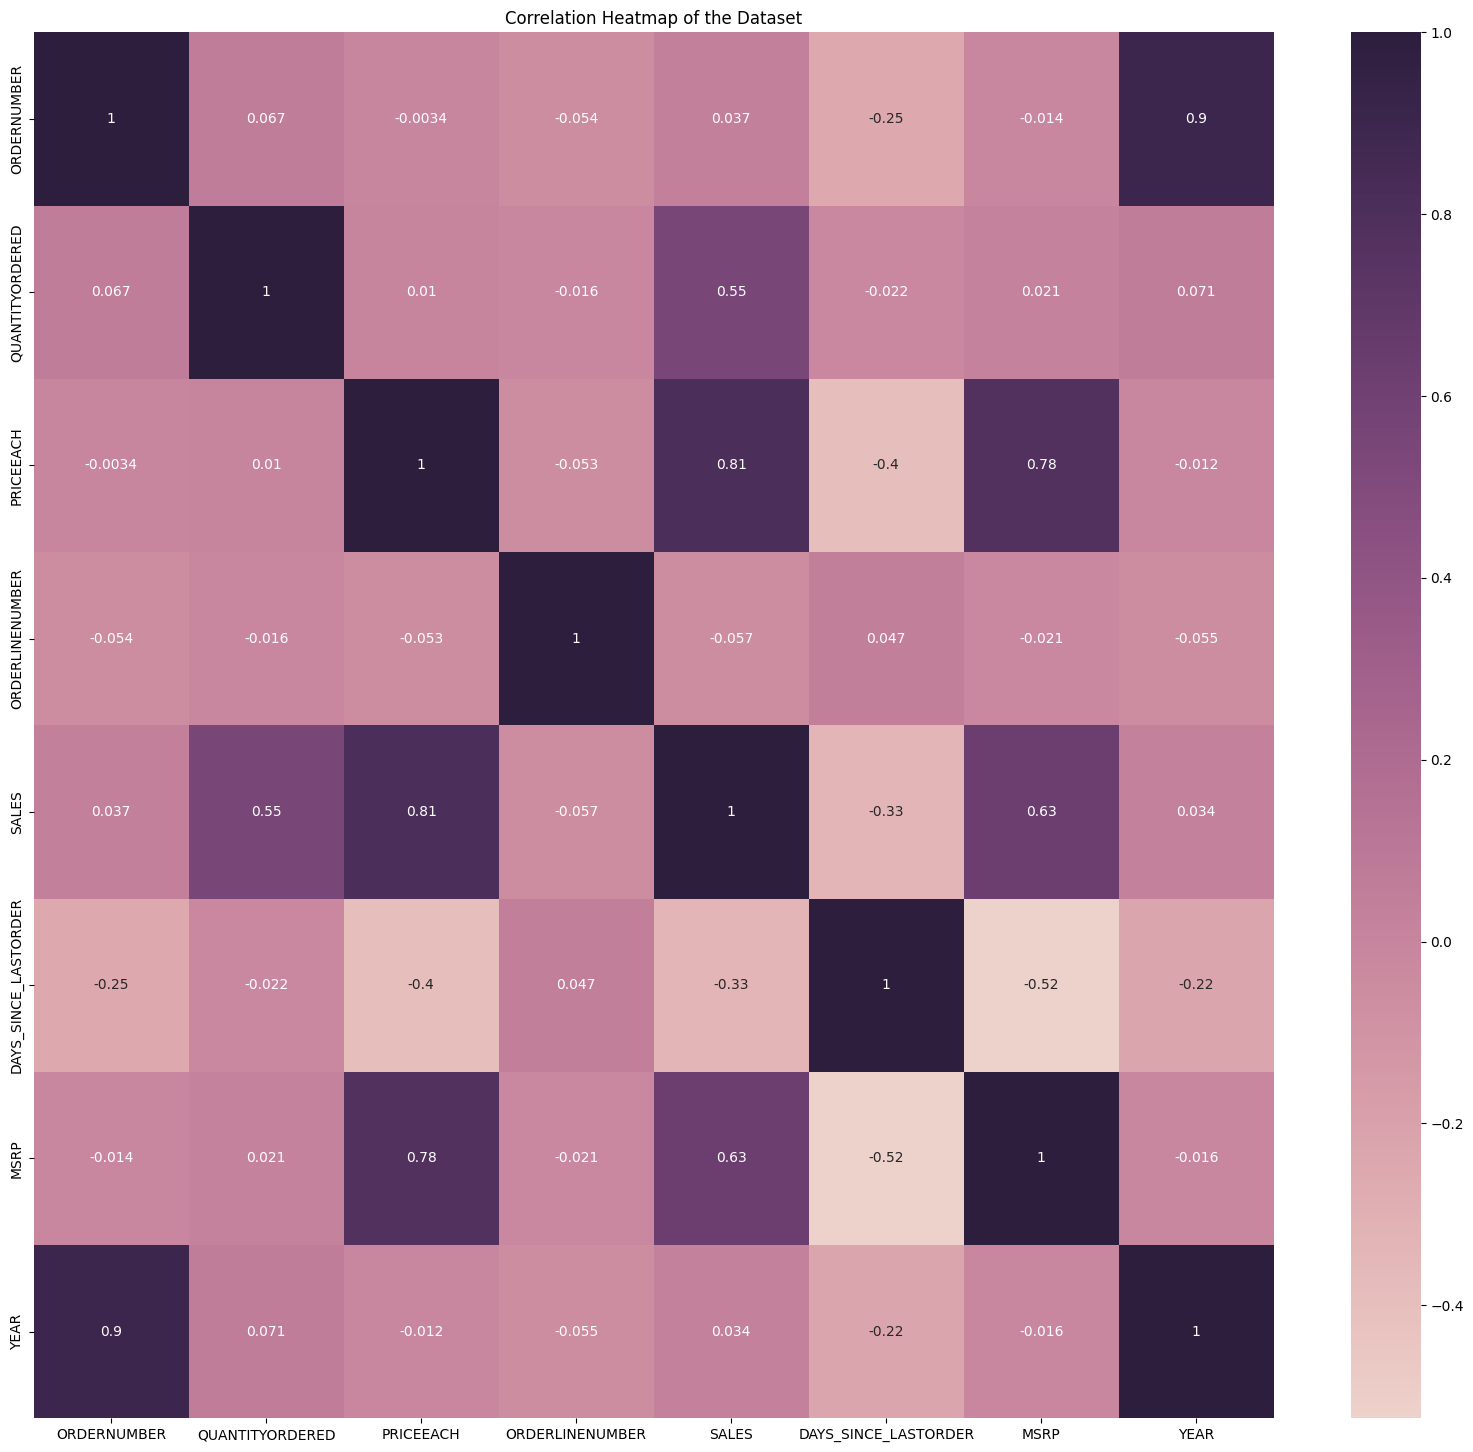

In [19]:
#Correlation Heatmap
plt.figure(figsize = (20,18))
sns.heatmap(dataset.corr(), annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation Heatmap of the Dataset")
plt.show()

Q1: Which years did the company have the most sales?

In [20]:
#Ans: 2019
year_sales = dataset.groupby(['YEAR'])[['SALES']].sum()
year_sales.sort_values('SALES', ascending = False)

,SALES
YEAR,
2019,4669924.56
2018,3353014.06
2020,1737283.09


In [21]:
year_sales = year_sales.reset_index()
year_sales

,YEAR,SALES
0,2018,3353014.06
1,2019,4669924.56
2,2020,1737283.09


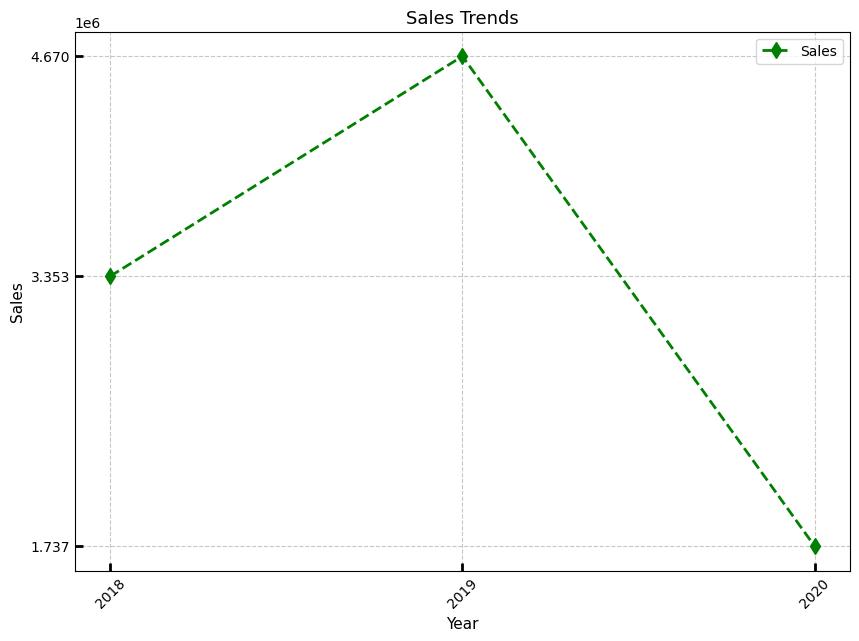

In [22]:
# Create a figure and axis
def line_plot(year_sales):
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot multiple lines with custom styles
    ax.plot(year_sales['YEAR'], year_sales['SALES'], label='Sales', color='green', linestyle='--', linewidth=2, marker='d', markersize=8)


    # Set plot title and labels
    ax.set_title('Sales Trends', fontsize=13)
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel('Sales', fontsize=11)

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    ax.legend()

    # Add annotations
    #ax.text(2, 1, 'Annotation 1', fontsize=10, color='blue', ha='center')


    # Set custom axis limits
    ax.set_xlim(2017.9, 2020.1)


    # Customize tick labels
    ax.set_xticks(np.arange(2018, 2021, 1))
    ax.set_yticks(year_sales['SALES'])

    # Customize tick parameters
    ax.tick_params(axis='both', which='both', direction='in', length=6, width=2, colors='black')

    #Rotate the x-axis labels
    plt.xticks(rotation = 45)

    # Show the plot
    plt.show()

line_plot(year_sales)

Q2: Which months did the company have the most sales?

In [23]:
#Ans: Nov
month_sales = dataset.groupby(['MONTH'])[['SALES']].sum().reset_index()
month_sales = month_sales.sort_values('SALES', ascending = False)

In [24]:
month_sales

,MONTH,SALES
9,Nov,1434766.44
10,Oct,1176388.43
3,Feb,951180.19
4,Jan,936964.83
8,May,862597.77
7,Mar,778674.68
0,Apr,744538.06
1,Aug,723921.76
6,Jun,684918.75
11,Sep,537356.33


<Figure size 1200x900 with 0 Axes>

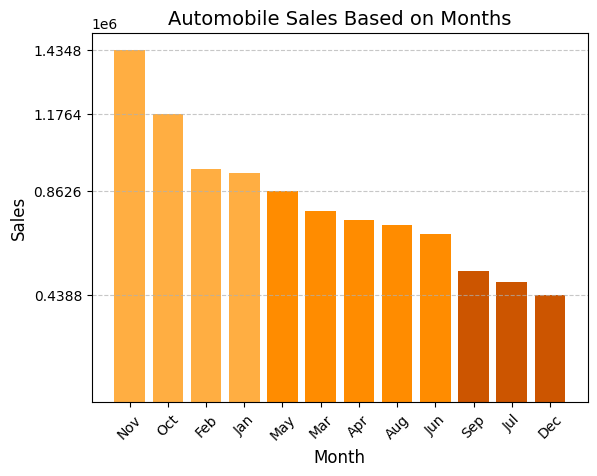

In [25]:
#defining a bar plot function to plot sales based on months
def plot_monthly_sales(month_sales):
    # Set a professional figure size
    plt.figure(figsize=(12, 9))

    # Create a subplot with specified colors
    fig, ax = plt.subplots()
    colors = ['#ffae42'] * 4 + ['#ff8c00'] * 5 + ['#cc5500'] * 3
    ax.bar(month_sales['MONTH'], month_sales['SALES'], color=colors)

    # Customize grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Set custom y-ticks
    ax.set_yticks([438811.18, 862597.77, 1176388.43, 1434766.44])

    # Set title and labels
    plt.title("Automobile Sales Based on Months", fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Sales", fontsize=12)
    #Rotate the x-axis labels
    plt.xticks(rotation = 45)

    # Show the plot
    plt.show()

#Calling the function
plot_monthly_sales(month_sales)


Q3: In which cities did the company have the highest sales?
(Top 5 cities with the highest sales)

In [26]:
city_sales = dataset.groupby(['CITY'])[['SALES']].sum().reset_index()
city_sales.sort_values('SALES', ascending = False).head(5)

,CITY,SALES
33,Madrid,1082551.44
59,San Rafael,654858.06
41,NYC,560787.77
61,Singapore,288488.41
51,Paris,268944.68


In [27]:
city_sales = dataset.groupby(['PRODUCTLINE', 'CITY'])[['SALES']].sum()
city_sales.sort_values('SALES', ascending = False).head(10)

SALES
PRODUCTLINE      CITY                 
Classic Cars     Madrid      450054.30
                 San Rafael  282079.44
                 NYC         260803.74
Vintage Cars     Madrid      208521.53
                 San Rafael  168967.80
Trucks and Buses Madrid      149286.09
Classic Cars     Singapore   132890.44
Trucks and Buses San Rafael  124434.52
Classic Cars     Gensve      117713.56
                 Paris       108026.22

Q3: What are the highest sales based on countries?

In [28]:
country_sales = dataset.groupby(['COUNTRY'])[['SALES']].sum().reset_index()
country_sales.sort_values('SALES', ascending = False)

,COUNTRY,SALES
18,USA,3355575.69
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


In [29]:
country_sales['COUNTRY'].replace({'USA':'United States of America', 'UK':'United Kingdom'}, inplace = True)

In [30]:
# Create a Folium Map centered at a specific location
m = folium.Map(location=[20, 0], zoom_start=2)

# Create Choropleth layer using built-in GeoJSON data
choropleth = folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    data=country_sales,
    columns=['COUNTRY', 'SALES'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales',
    name='Choropleth Layer',  # Add a name to the layer
    highlight=True,  # Highlight feature when mouseover
    smooth_factor=0  # Disable smooth zoom
).add_to(m)

# Lock the zoom level
m.add_child(folium.LatLngPopup())  # Popup with latitude and longitude
m.add_child(folium.ClickForMarker(popup='Waypoint'))  # Click for marker

# Display country names
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(fields=['name'], labels=False))

#display it
m


<ipython-input-31-e5e3f163b09a>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


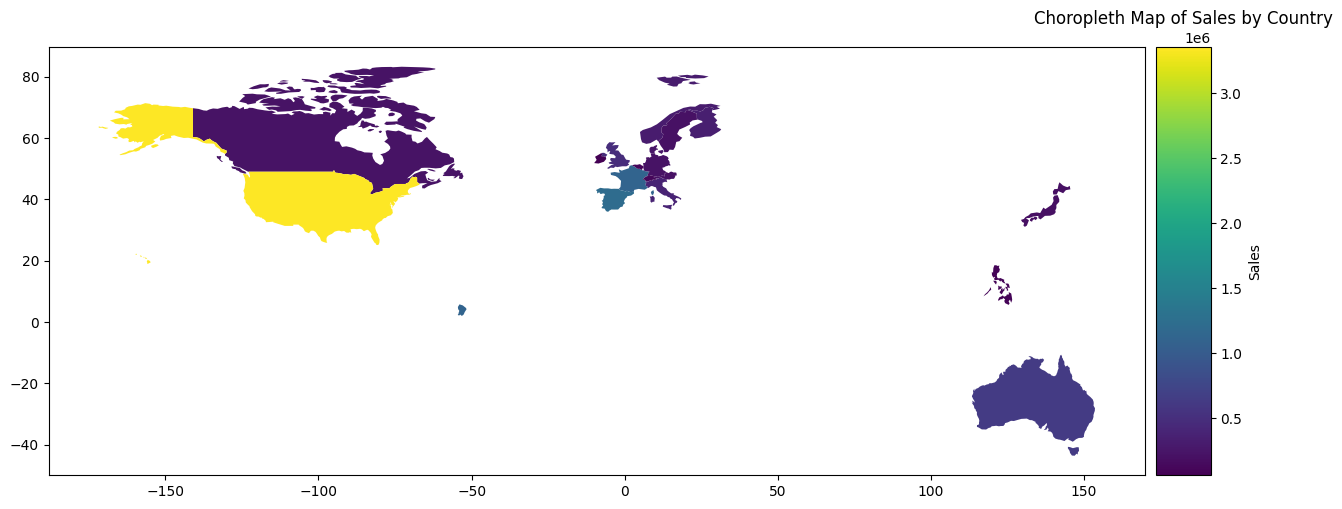

In [31]:
# Load world map data from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the sales data
world = world.merge(country_sales, how='left', left_on='name', right_on='COUNTRY')

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='SALES', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Sales"})

# Add title
plt.title('Choropleth Map of Sales by Country')

# Show the plot
plt.show()


Q4: Which products had the most sales in the past three years?

In [32]:
dataset.groupby(['PRODUCTLINE'])[['SALES']].sum()

,SALES
PRODUCTLINE,
Classic Cars,3842868.54
Motorcycles,1103512.19
Planes,969323.42
Ships,700039.22
Trains,226243.47
Trucks and Buses,1111559.19
Vintage Cars,1806675.68


In [33]:
dataset.groupby(['PRODUCTLINE', 'YEAR'])[['SALES']].sum()

SALES
PRODUCTLINE      YEAR            
Classic Cars     2018  1435572.13
                 2019  1754056.17
                 2020   653240.24
Motorcycles      2018   308019.43
                 2019   560545.23
                 2020   234947.53
Planes           2018   272257.60
                 2019   496991.65
                 2020   200074.17
Ships            2018   244821.09
                 2019   335692.62
                 2020   119525.51
Trains           2018    72802.29
                 2019   116523.85
                 2020    36917.33
Trucks and Buses 2018   420429.93
                 2019   522429.94
                 2020   168699.32
Vintage Cars     2018   599111.59
                 2019   883685.10
                 2020   323878.99

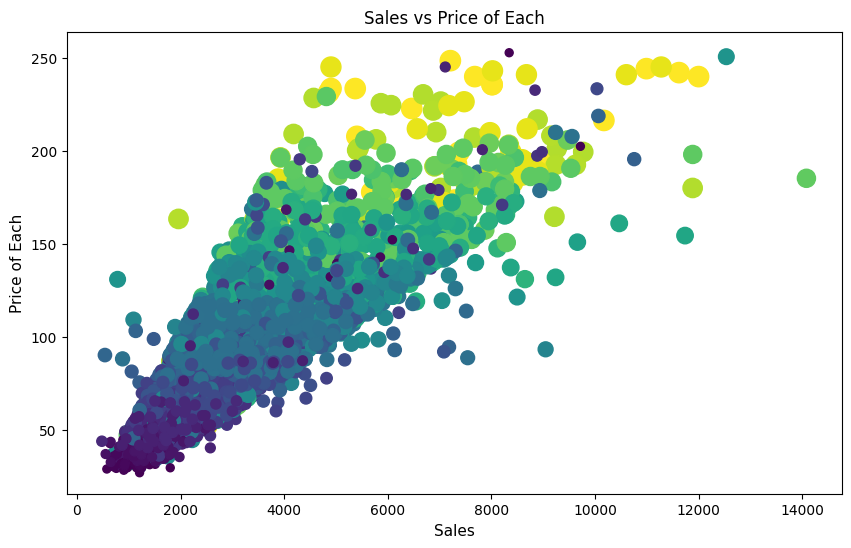

In [34]:
'''As it was obvious from the correlation graph,
 there is a direct association between Sales and Price of each'''
plt.figure(figsize = (10,6))
plt.scatter(x = dataset['SALES'], y = dataset['PRICEEACH'], c = dataset['MSRP'], s = dataset['MSRP'])
plt.title("Sales vs Price of Each")
plt.xlabel("Sales", fontsize = 11)
plt.ylabel("Price of Each", fontsize = 11)
plt.show()

<Figure size 1100x800 with 0 Axes>

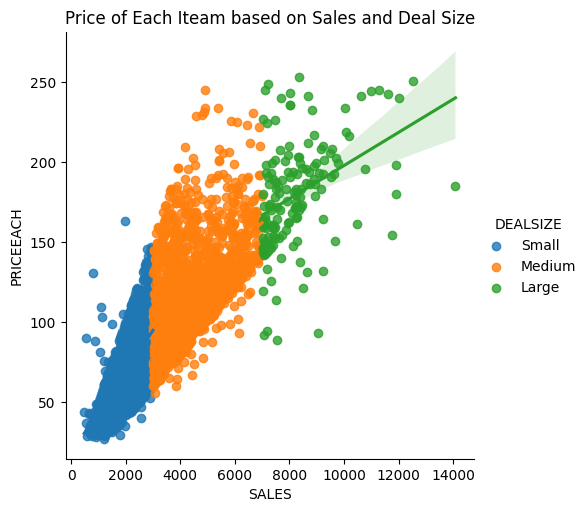

In [35]:
#The higher is the product's sales and price, the larger is the dealsize
#In other words, medium dealsize has a higher sales and price values than the small dealsize!
plt.figure(figsize = (11, 8))
sns.lmplot(x = 'SALES', y = 'PRICEEACH', hue = 'DEALSIZE', data = dataset)
plt.title("Price of Each Iteam based on Sales and Deal Size")
plt.show()

In [36]:
#Let's find out the orders' status
#From all orders that the company got between the year of 2018-2020, only 60 orders were cancelled!
dataset['STATUS'].value_counts()

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [37]:
#Let's get all cancelled orders
all_cancel = dataset[dataset['STATUS'] == 'Cancelled']
all_cancel.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAY,MONTH,YEAR
103,10167,44,134.64,9,5924.16,2018-10-23,690,Cancelled,Classic Cars,136,...,?kergatan 24,Boras,S-844 67,Sweden,Larsson,Maria,Medium,Tue,Oct,2018
108,10248,20,145.52,3,2910.40,2019-07-05,499,Cancelled,Classic Cars,136,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,Fri,Jul,2019
161,10253,24,163.44,13,3922.56,2019-01-06,527,Cancelled,Classic Cars,194,...,Berkeley Gardens 12 Brewery,Liverpool,WX1 6LT,UK,Devon,Elizabeth,Medium,Sun,Jan,2019
286,10253,22,109.22,11,2402.84,2019-01-06,652,Cancelled,Classic Cars,117,...,Berkeley Gardens 12 Brewery,Liverpool,WX1 6LT,UK,Devon,Elizabeth,Small,Sun,Jan,2019
336,10253,25,90.17,14,2254.25,2019-01-06,702,Cancelled,Classic Cars,79,...,Berkeley Gardens 12 Brewery,Liverpool,WX1 6LT,UK,Devon,Elizabeth,Small,Sun,Jan,2019


Q6: Which cities had the most cancellation in the past three days?

In [38]:
all_cancel.groupby(['CITY'])['CITY'].count()

CITY
Boras        16
Liverpool    14
Madrid       16
NYC          14
Name: CITY, dtype: int64

<Axes: xlabel='CITY', ylabel='count'>

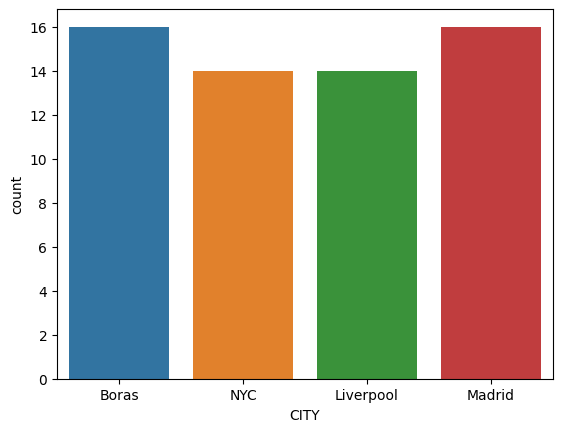

In [39]:
#Let's plot the count plot using seaborn to observe the cancellation distribution.
sns.countplot(data = all_cancel, x = 'CITY')

In [40]:
dataset[dataset['STATUS'] == 'Disputed']

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAY,MONTH,YEAR
23,10417,66,113.88,2,7516.08,2020-05-13,42,Disputed,Motorcycles,95,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Large,Wed,May,2020
73,10417,45,130.83,5,5887.35,2020-05-13,92,Disputed,Motorcycles,118,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,Wed,May,2020
97,10417,56,164.61,4,9218.16,2020-05-13,116,Disputed,Motorcycles,193,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Large,Wed,May,2020
249,10417,21,164.18,1,3447.78,2020-05-13,268,Disputed,Motorcycles,150,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,Wed,May,2020
452,10406,61,137.29,3,8374.69,2020-04-15,499,Disputed,Classic Cars,141,...,Vinb'ltet 34,Kobenhavn,1734,Denmark,Petersen,Jytte,Large,Wed,Apr,2020
623,10406,48,149.36,2,7169.28,2020-04-15,670,Disputed,Classic Cars,142,...,Vinb'ltet 34,Kobenhavn,1734,Denmark,Petersen,Jytte,Large,Wed,Apr,2020
796,10417,36,61.18,6,2202.48,2020-05-13,815,Disputed,Motorcycles,60,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,Wed,May,2020
1142,10406,65,161.06,1,10468.90,2020-04-15,1189,Disputed,Classic Cars,141,...,Vinb'ltet 34,Kobenhavn,1734,Denmark,Petersen,Jytte,Large,Wed,Apr,2020
1192,10415,51,121.75,5,6209.25,2020-09-05,1215,Disputed,Vintage Cars,105,...,7 Allen Street,Glen Waverly,3150,Australia,Connery,Sean,Medium,Sat,Sep,2020
1438,10417,35,101.43,3,3550.05,2020-05-13,1457,Disputed,Motorcycles,112,...,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,Wed,May,2020


# Dashboard

In [43]:
pip install dash

In [44]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 35.6 MB/s eta 0:00:00


In [45]:
#It is important to convert all country names into the correct format (Three letter abbreviation).
import pycountry

def convert_to_three_letter_code(country_name):
    try:
      if country_name == 'UK':
        return 'GBR'
      elif country_name == 'USA':
        return country_name
      else:
          country = pycountry.countries.get(name=country_name)
          if country:
              return country.alpha_3
          else:
            return 'Unknown'
    except AttributeError:
        return 'Unknown'


In [46]:
from dash import Dash, html, dcc, Input, Output, callback
import plotly.express as px
import pandas as pd


colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}


app = Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': colors['background']},
    children=[
        html.H1("Automobile Company Sales' Report", style={'textAlign': 'center', 'color': colors['text']}),

        html.Div([
            html.Div([
                html.H3('Monthly Sales of all Products', style={"textAlign": "center", "color": colors['text']}),
                dcc.Slider(
                    min=dataset['YEAR'].min(),
                    max=dataset['YEAR'].max(),
                    step=None,
                    value=dataset['YEAR'].min(),
                    marks={str(year): str(year) for year in dataset['YEAR'].unique()},
                    id='year-slider'
                ),
                dcc.Graph(id="bar-graph-month")
            ], style={'width': '49%', 'display': 'inline-block'}),

            html.Div([
                html.H3("Product Price vs Market Sales", style={"textAlign": "center", "color": colors['text']}),
                dcc.Graph(id="scatter-graph-sales")
            ], style={'width': '49%', 'display': 'inline-block'})
        ]),

        html.Div([
            html.Div([
                html.H3("Sales Based on Countries", style={"textAlign": "center", "color": colors['text']}),
                dcc.Graph(id='geo-plot-sales')
            ], style={'width': '49%', 'display': 'inline-block'}),

            html.Div([
                html.H3("Sales Based on Year and City", style={"textAlign": "center", "color": colors['text']}),
                dcc.Dropdown(
                    options=[{'label': city, 'value': city} for city in dataset['CITY'].unique()],
                    value='Paris',
                    id='input-city',
                    style={'color':colors['text'], 'background': colors['background']}
                ),
                dcc.Graph(id='tree-map-sales')
            ], style={'width': '49%', 'display': 'inline-block'})
        ])
    ]
)




@callback(
    [Output('bar-graph-month', 'figure'), Output('scatter-graph-sales', 'figure'),
     Output('geo-plot-sales', 'figure'), Output('tree-map-sales', 'figure')],
    Input('year-slider', 'value'), Input('input-city', 'value'))

def update_figure(selected_year, input_city):
    # Filter dataset based on selected year
    filtered_df = dataset[dataset.YEAR == selected_year]

    # Monthly sales by product line
    mon_sales = filtered_df.groupby(['MONTH', 'PRODUCTLINE'])[['SALES']].sum().reset_index()

    # Define the custom order of months
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Bar chart for monthly sales
    fig0 = px.bar(mon_sales, x='MONTH', y='SALES', color='PRODUCTLINE', category_orders={'MONTH': month_order})
    fig0.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        xaxis_tickangle=-45
    )

    # Scatter plot for product sales vs price
    fig1 = px.scatter(dataset, x='SALES', y='PRICEEACH', color='DEALSIZE', size_max=10)
    fig1.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text']
    )

    # Choropleth map for country-wise sales
    country_sales = dataset.groupby(['YEAR', 'COUNTRY'])[['SALES']].sum().reset_index()
    country_sales['COUNTRY'] = [convert_to_three_letter_code(country) for country in country_sales['COUNTRY']]

    fig2 = px.choropleth(
        country_sales,
        locations="COUNTRY",
        color="SALES",
        hover_name="COUNTRY",
        animation_frame='YEAR',
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Plasma
    )
    fig2.update_layout(
        geo=dict(bgcolor="black"),
        paper_bgcolor="black",
        font_color="white",
        updatemenus=[
            dict(
                type='buttons',
                showactive=False,
                buttons=[
                    dict(label='Play',
                         method='animate',
                         args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]),
                    dict(label='Pause',
                         method='animate',
                         args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate')])
                ]
            )
        ]
    )

    # Treemap for city-wise sales
    df = dataset[dataset.CITY == input_city]
    fig3 = px.treemap(df, path=[px.Constant("all"), 'YEAR', 'CITY', 'PRODUCTLINE'], values='SALES')
    fig3.update_traces(root_color=colors['background'], marker=dict(cornerradius=5))
    fig3.update_layout(
        margin=dict(t=50, l=25, r=25, b=25),
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text']
    )

    return fig0, fig1, fig2, fig3



if __name__ == '__main__':
    app.run(debug = True)

<IPython.core.display.Javascript object>